In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Probability_theory':
  os.chdir(r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Probability_theory')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/yz/9_3w8_1j16g4r8mnf_4c_6pm0000gn/T/ipykernel_18011/2740927134.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439058.586277, "/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439058.588179, "/Users/apolloos/anaconda3/lib/python3.11/zipimport.py": 1694439057.809952, "/Users/apolloos/anaconda3/lib/python3.11/codecs.py": 1694439057.572709, "/Users/apolloos/anaconda3/lib/python3.11/encodings/aliases.py": 1694439058.134947, "/Users/apolloos/anaconda3/lib/python3.11/encodings/__init__.py": 1694439058.132963, "/Users/apolloos/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439058.359777, "/Users/apolloos/anaconda3/lib/python3.11/abc.py": 1694439057.54054, "/Users/apolloos/anaconda3/lib/python3.11/io.py": 1694439057.639787, "/Users/apolloos/anaconda3/lib/python3.11/stat.py": 1694439057.744279, "/Users/apolloos/anaconda3/lib/python3.11/_collections_abc.py": 1694439057.519174, "/Users/apolloos/anaconda3/lib/python3.11/genericpath.py": 1694439057.614934, "/Users/apolloos/anaconda3/lib/python3.11/posi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./spamhamdata.csv', sep = '\t', header=None)
df.columns = ['email_type', 'text']
df['label']=df['email_type'].apply(lambda x: 0 if x == 'ham' else 1)
df.head(7)

,email_type,text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0


In [4]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def clean_text(sentence):

  # Converting all words to lower
  sentence_lowered=sentence.lower()

  # removing puntuations and numbers using regular expression
  sentence_no_numbers = re.sub(r'\d+', '', sentence_lowered)
  sentence_no_punctuations = re.sub(r'[^\w\s]', '', sentence_no_numbers)
  sentence_no_extra_spaces = re.sub(' +', ' ', sentence_no_punctuations)

  # fetched words from nltk package
  stop = stopwords.words('english')

  stop_words_removed_sentence=[]
  for k in sentence_no_extra_spaces.split(" "):
    if k not in stop:
      stop_words_removed_sentence = [lemmatizer.lemmatize(word) for word in sentence_no_extra_spaces.split() if word not in stop and len(word) > 2]
  return stop_words_removed_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apolloos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apolloos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# example of text cleaning
text_sample="I am..  ..  $so angry.. that a cu i made this post available"
clean_text(text_sample)

['angry', 'made', 'post', 'available']

In [6]:
df['keywords']=df['text'].apply(clean_text)
df.head(5)

,email_type,text,label,keywords
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,0,"[lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,U dun say so early hor... U c already then say...,0,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, go, usf, life, around, though]"


In [7]:
#getting the most frequently repeated words
#| echo: false
all_words=[]
for i in df['keywords']:
  for j in i:
    all_words.append(j)
count =[]
for i in all_words:
  count.append(all_words.count(i))
df_words_count = pd.DataFrame([all_words, count], index = ['words', 'count']).T
df_words_count.drop_duplicates(inplace=True)
df_words_count.sort_values('count', ascending=False)

,words,count
93,call,605
410,get,401
40,dont,298
16,free,278
405,ltgt,276
...,...,...
16257,visitor,1
16241,forwarding,1
16239,brilliantly,1
16226,outreach,1


In [8]:
#selecting 149 highly repeated words
df_high_freq = df_words_count[df_words_count['count'] > 50]
high_freq_word = list(df_high_freq['words'])
len(df_high_freq.index)

149

In [9]:
# counting instances of occurence of highly repeated words in ham and spam emails
ham=[]
spam=[]
for word in high_freq_word:
  ham_count=0
  spam_count=0
  for ind in range(len(df)):
    current_row = df.iloc[ind]
    if word in current_row['keywords']:
      if current_row['label']==0:
        ham_count+=1
      else:
        spam_count+=1
  #print(word,ham_count,spam_count)
  ham.append(ham_count)
  spam.append(spam_count)
df_odds = pd.DataFrame([high_freq_word, ham, spam], index= ['keywords','ham_count','spam_count']).T
df_odds = df_odds[df_odds['spam_count'] != 0]
df_odds.head(5)

,keywords,ham_count,spam_count
0,great,93,11
1,got,222,7
2,wat,91,1
3,free,58,169
4,win,12,62


In [10]:
import pandas as pd
from scipy.stats import fisher_exact

# Calculate odds ratio and p-value for each word
odds_ratios = []
p_values = []

for index, row in df_odds.iterrows():
    contingency_table = [
        [row['spam_count'], row['ham_count']],
        [len(df.index) - row['spam_count'], len(df.index) - row['ham_count']]
    ]

    odds_ratio, p_value = fisher_exact(contingency_table)
    odds_ratios.append(odds_ratio)
    p_values.append(p_value)

# Add results to the data frame
df_odds['Odds_Ratio'] = odds_ratios
df_odds['P_Value'] = p_values

# Display the updated data frame
df_odds.head(5)

,keywords,ham_count,spam_count,Odds_Ratio,P_Value
0,great,93,11,0.116535,1.838932e-17
1,got,222,7,0.030313,1.735920e-57
2,wat,91,1,0.010811,2.614224e-26
3,free,58,169,2.973654,5.124485e-14
4,win,12,62,5.213551,2.553913e-09


In [11]:
# Apply Benjamini-Hochberg correction
from statsmodels.stats.multitest import multipletests
_, corrected_p_values, _, _ = multipletests(df_odds['P_Value'], method='fdr_bh')
df_odds['FDR_Corrected_P_Value'] = corrected_p_values

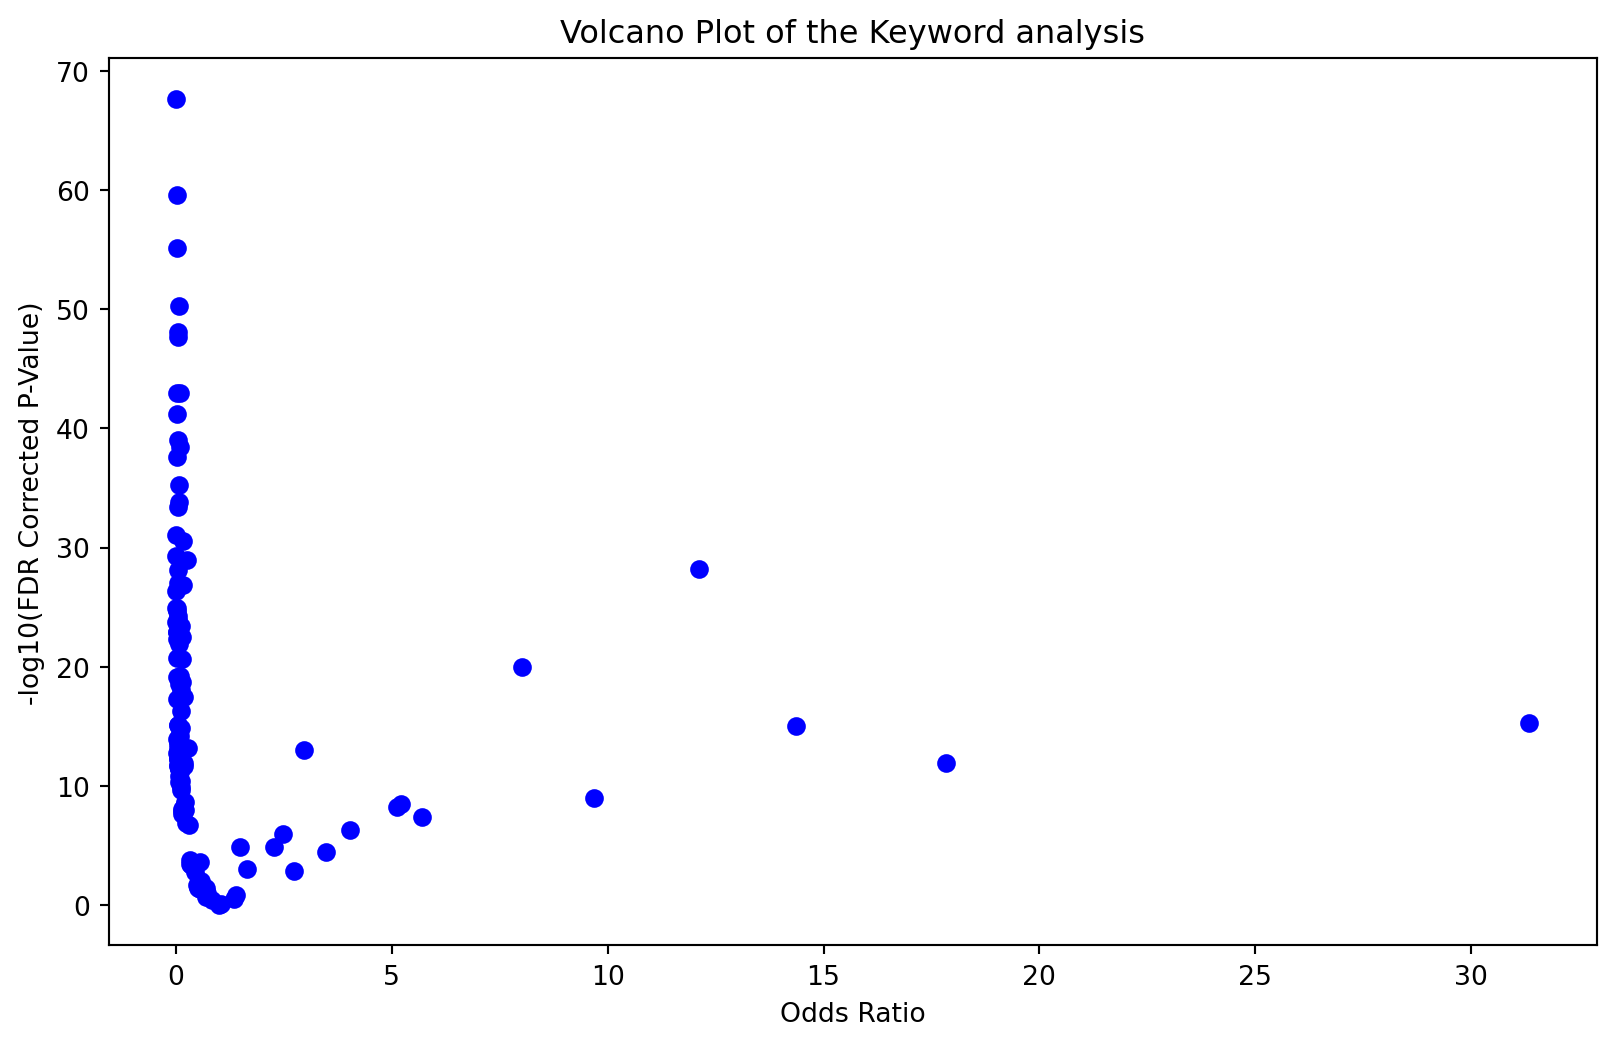

In [12]:
# Create a volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(df_odds['Odds_Ratio'], -1 * np.log10(df_odds['FDR_Corrected_P_Value']), color='blue')

# Add labels and title
plt.xlabel('Odds Ratio')
plt.ylabel('-log10(FDR Corrected P-Value)')
plt.title('Volcano Plot of the Keyword analysis')

# Show the plot
plt.show()

In [13]:
df_final = df_odds[(df_odds['Odds_Ratio'] > 5) & (df_odds['FDR_Corrected_P_Value'] < 10**-5)]
list(df_final['keywords'])

['win',
 'txt',
 'customer',
 'prize',
 'claim',
 'mobile',
 'cash',
 'urgent',
 'nokia',
 'service',
 'box',
 'tone']